# Mortgage New-York 2015

##### Group 2
##### Our names:
- Yair Amar 
- Roni Kronitz
- Moriya Margaliot

## תוכן העניינים:
1. [מבוא](#מבוא)
2. [סידור_ותיקון_הנתונים](#סידור_ותיקון_הנתונים)
3. [הצגת_הנתונים](#הצגת_הנתונים)
4. [תוכן_הפרויקט](#תוכן_הפרויקט)
5. [חיזוי](#חיזוי) 
6. [סיכום](#סיכום)


## מבוא
### חוק גילוי משכנתא לדירה מחייב מוסדות פיננסיים רבים לשמור, לדווח ולחשוף בפומבי מידע על משכנתאות.
### בקובץ מוצגות כל החלטות המשכנתא שהתקבלו בשנת 2015 במדינת ניו יורק.



####  https://www.kaggle.com/jboysen/ny-home-mortgage/version/1 - לינק לקובץ המקורי

In [96]:
from IPython.core.display import Image
Image(url = "https://www.judygray.com/wp-content/uploads/2017/02/JUDY-blog-Mortgage.jpg",  width=750, height=750)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## סידור_ותיקון_הנתונים

####  .Emipre center ניתחנו את המסקנות על פי פילוחים לעשירון עליון ולעשירון תחתון. המידע נלקח מהאתר
 https://www.empirecenter.org/publications/nycs-high-income-tax-habit/

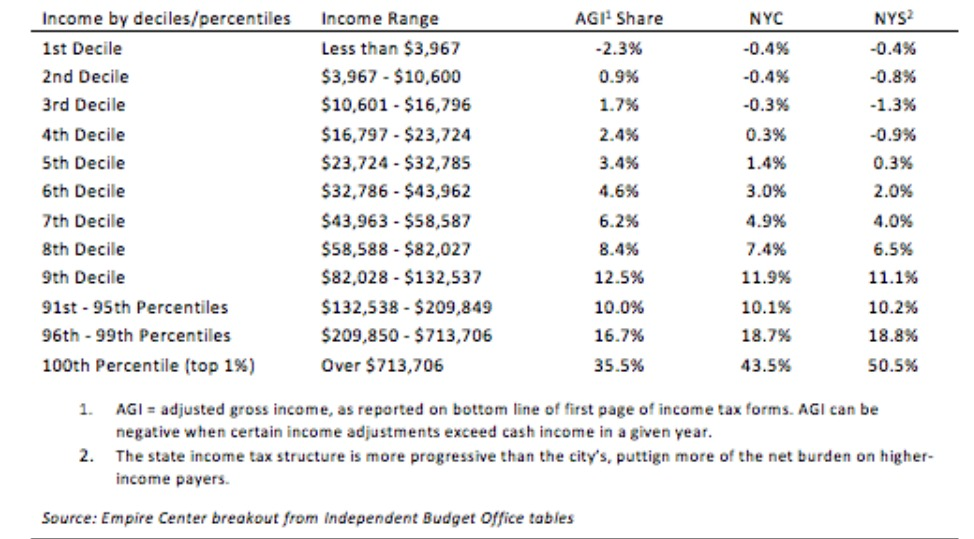

#### .הקובץ המקורי הכיל כ- 440,000 שורות. מפאת אילוצי גודל, יצרנו קובץ חדש המכיל כ- 25,000 שורות. הסינון נעשה בצורה רנדומלית, כדי לשמור על אמינות הנתונים
####                                                      .בנוסף, סידרנו את הנתונים לפי מה שהיה רלוונטי אלינו, על ידי הסרת עמודות ושורות והתאמת הנתונים 
                                                                                                                                                                                                                  

In [98]:
url = 'https://raw.githubusercontent.com/yairamar097/NY_mortgage_2015/main/ny_hmda_mini_2015.csv'
mortgage = pd.read_csv(url)
mortgage = mortgage.copy()

mortgage = mortgage.loc[(mortgage.applicant_sex == 1) | (mortgage.applicant_sex == 2)]
mortgage = mortgage.loc[~((mortgage.applicant_race_1 == 6) | (mortgage.applicant_race_1 == 7))]

c:\users\moriy\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (16,17,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [99]:
mortgage = mortgage.drop(columns=['co_applicant_race_5', 'co_applicant_race_name_5', 'co_applicant_race_name_4', 'co_applicant_race_name_3', 'co_applicant_race_4', 'co_applicant_race_3', 'co_applicant_race_2', 'co_applicant_race_name_2'])
mortgage = mortgage.drop(columns=['applicant_race_5', 'applicant_race_name_5', 'applicant_race_name_4', 'applicant_race_name_3', 'applicant_race_4', 'applicant_race_3', 'applicant_race_2', 'applicant_race_name_2'])
mortgage = mortgage.drop(columns=['denial_reason_3', 'denial_reason_name_3', 'rate_spread', 'denial_reason_2', 'denial_reason_name_2', 'denial_reason_1', 'denial_reason_name_1', 'edit_status', 'edit_status_name'])
mortgage = mortgage.drop(columns=['msamd', 'msamd_name'])
mortgage = mortgage.dropna()

In [100]:
application_denied = mortgage.loc[mortgage.action_taken == 3]
application_confirmed  = mortgage.loc[(mortgage.action_taken == 6) | (mortgage.action_taken == 2)]
data = application_denied.append(application_confirmed, ignore_index = True)

mortgage = mortgage.reset_index(drop = True)
mortgage.loan_amount_000s = mortgage.loan_amount_000s.astype(float)

In [101]:
mortgage = mortgage.loc[(mortgage.applicant_sex == 1) | (mortgage.applicant_sex == 2)]
mortgage = mortgage.loc[~((mortgage.applicant_race_1 == 6) | (mortgage.applicant_race_1 == 7))]
application_denied = mortgage.loc[mortgage.action_taken == 3]
application_confirmed  = mortgage.loc[(mortgage.action_taken == 6) | (mortgage.action_taken == 2)]
data = application_denied.append(application_confirmed, ignore_index = True)

### הצגת_הנתונים 

In [102]:
m1 = mortgage.iloc[0:3]
m2 = mortgage.iloc[-3:]
dis = m1.append(m2)
dis

,Unnamed: 0,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,...,state_code,state_abbr,state_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
0,165885,1,Loan originated,5,NCUA,National Credit Union Administration,2,Not Hispanic or Latino,140.0,5,...,36,NY,New York,71300.0,365.0,2044.0,1904.0,11.690000,6358.0,307.649994
1,436263,6,Loan purchased by the institution,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,92.0,5,...,36,NY,New York,109000.0,194.0,2497.0,2314.0,10.280000,7928.0,102.169998
2,139554,1,Loan originated,2,FRS,Federal Reserve System,2,Not Hispanic or Latino,192.0,5,...,36,NY,New York,66400.0,57.0,1752.0,956.0,26.980000,5074.0,95.620003
25678,419577,6,Loan purchased by the institution,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,51.0,5,...,36,NY,New York,71300.0,149.0,262.0,892.0,36.290001,3015.0,105.309998
25679,403556,6,Loan purchased by the institution,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,110.0,3,...,36,NY,New York,71300.0,327.0,556.0,96.0,98.970001,3580.0,42.990002
25680,54593,1,Loan originated,9,CFPB,Consumer Financial Protection Bureau,2,Not Hispanic or Latino,36.0,5,...,36,NY,New York,71300.0,91.0,1036.0,2290.0,29.430000,5128.0,112.279999


,action_taken_num,action_taken
0,1,ההלוואה בתהליך
1,2,הבקשה אושרה אך לא נלקחה
2,3,הבקשה נדחתה
3,4,הבקשה בוטלה על ידי המבקש
4,5,הקובץ נסגר בגלל חוסר השלמות
5,6,הלוואה שנרכשה


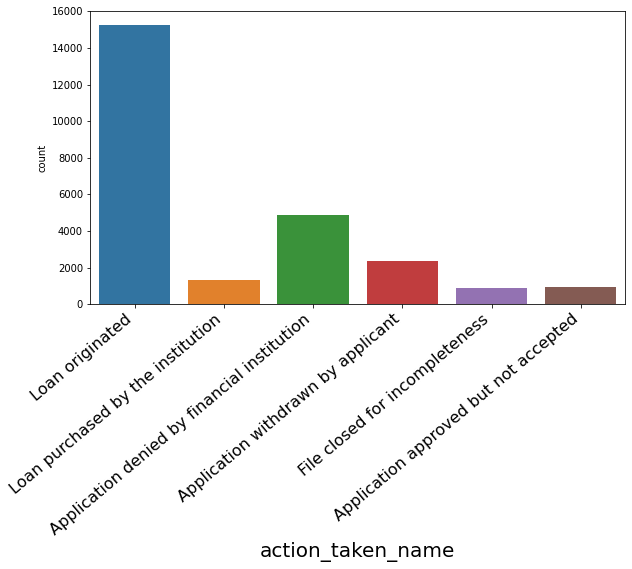

In [143]:
action_taken_num = [1, 2, 3, 4, 5, 6]
action_taken = ['ההלוואה בתהליך', ' הבקשה אושרה אך לא נלקחה', 'הבקשה נדחתה', 'הבקשה בוטלה על ידי המבקש', 'הקובץ נסגר בגלל חוסר השלמות', 'הלוואה שנרכשה' ]
df = pd.DataFrame({'action_taken_num':action_taken_num, 'action_taken':action_taken})

fig, ax = plt.subplots(figsize = (9,8))
graph = sns.countplot(data = mortgage, x = 'action_taken_name')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel("action_taken_name", fontsize = 20)
plt.xticks(size = 16)

df


## תוכן_הפרויקט

##### על מנת לפלח את הנתונים למעמדות כלכליים- יצרנו פונקציות שבעזרתן הכנסנו את הפילוח לעמודות חדשות בדאטה

In [104]:
def status_func (row):
   if row['applicant_income_000s'] < 3.967 :
      return 'lower'
   elif row['applicant_income_000s'] > 132.537:
      return 'higher'
   else:
     return 'middle'
    
def status_num_func (row):
    if row['applicant_income_000s'] < 3.967 :
        return 1
    elif row['applicant_income_000s'] > 132.537:
        return 3
    else:
        return 2
    
data = data.copy()
application_denied = application_denied.copy()
application_confirmed = application_confirmed.copy()
data['status'] = data.apply (lambda row: status_func(row), axis=1)
mortgage['status'] = mortgage.apply (lambda row: status_func(row), axis=1)
application_denied['status'] = application_denied.apply (lambda row: status_func(row), axis=1)
application_confirmed['status'] = application_confirmed.apply (lambda row: status_func(row), axis=1)

mortgage['status_num'] = mortgage.apply (lambda row: status_num_func(row), axis=1)
application_denied['status_num'] = application_denied.apply (lambda row: status_num_func(row), axis=1)
application_confirmed['status_num'] = application_confirmed.apply (lambda row: status_num_func(row), axis=1)

##### :חישבנו את האחוזים של כל מעמד כלכלי, בכל אחד מהחלקים הבאים 
##### .ההלוואה נדחתה, ההלוואה אושרה ולא נקלחה, ההלוואה אושרה ונלקחה

In [105]:
total_denied = len(data.loc[data.action_taken == 3])
per_lower_denied = (len(data.loc[(data.action_taken == 3) & (data.status == 'lower')]) / total_denied) * 100
per_middle_denied = (len(data.loc[(data.action_taken == 3) & (data.status == 'middle')]) / total_denied) * 100
per_higher_denied = (len(data.loc[(data.action_taken == 3) & (data.status == 'higher')]) / total_denied) * 100

total_confirmed_not_taken = len(data.loc[data.action_taken == 2])
lower_confirmed_not_taken = (len(data.loc[(data.action_taken == 2) & (data.status == 'lower')]) / total_confirmed_not_taken) * 100
middle_confirmed_not_taken = (len(data.loc[(data.action_taken == 2) & (data.status == 'middle')]) / total_confirmed_not_taken) * 100
higher_confirmed_not_taken = (len(data.loc[(data.action_taken == 2) & (data.status == 'higher')]) / total_confirmed_not_taken) * 100

total_confirmed_not_taken = len(data.loc[data.action_taken == 6])
lower_confirmed_taken = (len(data.loc[(data.action_taken == 6) & (data.status == 'lower')]) / total_confirmed_not_taken) * 100
middle_confirmed_taken = (len(data.loc[(data.action_taken == 6) & (data.status == 'middle')]) / total_confirmed_not_taken) * 100
higher_confirmed_taken = (len(data.loc[(data.action_taken == 6) & (data.status == 'higher')]) / total_confirmed_not_taken) * 100

percents = [per_lower_denied, per_middle_denied, per_higher_denied, lower_confirmed_not_taken, middle_confirmed_not_taken, higher_confirmed_not_taken, lower_confirmed_taken, middle_confirmed_taken, higher_confirmed_taken]
category = ['per_lower_denied', 'per_middle_denied', 'per_higher_denied', 'lower_confirmed_not_taken', 'middle_confirmed_not_taken', 'higher_confirmed_not_taken', 'lower_confirmed_taken', 'middle_confirmed_taken', 'higher_confirmed_taken']
df =  pd.DataFrame({'percents':percents, 'category':category})

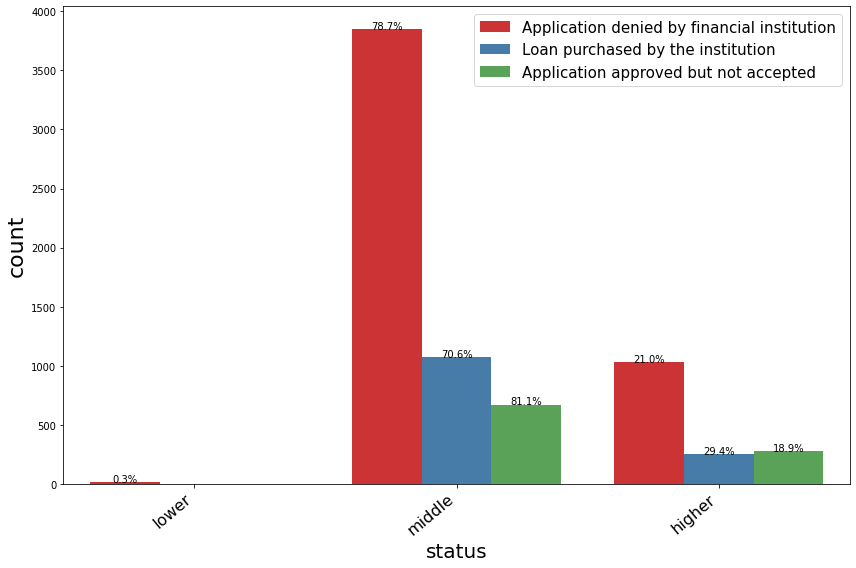

In [132]:
plt.xlabel('status', fontsize = 22)
plt.ylabel('count', fontsize = 22)
plt.rcParams["figure.figsize"] = [11,7]
plt.xlabel('applicant_income_000s', fontsize = 20)
plt.rcParams["figure.autolayout"] = True
plt.xticks(size = 16)

x = category
y = percents
percentage = percents
df = sns.countplot(data = data, x = 'status',hue = 'action_taken_name', palette = "Set1", order = ['lower', 'middle', 'higher'])
patches = df.patches

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   df.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
df.set_xticklabels(df.get_xticklabels(), rotation=40, ha="right")
df.legend(fontsize = 15)
plt.show()

#### .מהנתונים ניתן ללמוד כי העשירון העליון נוטל בשוק המשכנתאות חלק גדול בהרבה ממשקלו באוכלוסיה - כמעט 30% (פי  3 מגודלו באוכלוסיה)
#### .בנוסף לכך, העשירון העליון נוטל חלק של כמעט 20% מהמשכנתאות שאושרו ולא נלקחו
#### .מנגד, אנו רואים כי לעשירון התחתון לא אושרה אפילו בקשת הלוואה אחת

<AxesSubplot:xlabel='applicant_income_000s', ylabel='loan_amount_000s'>

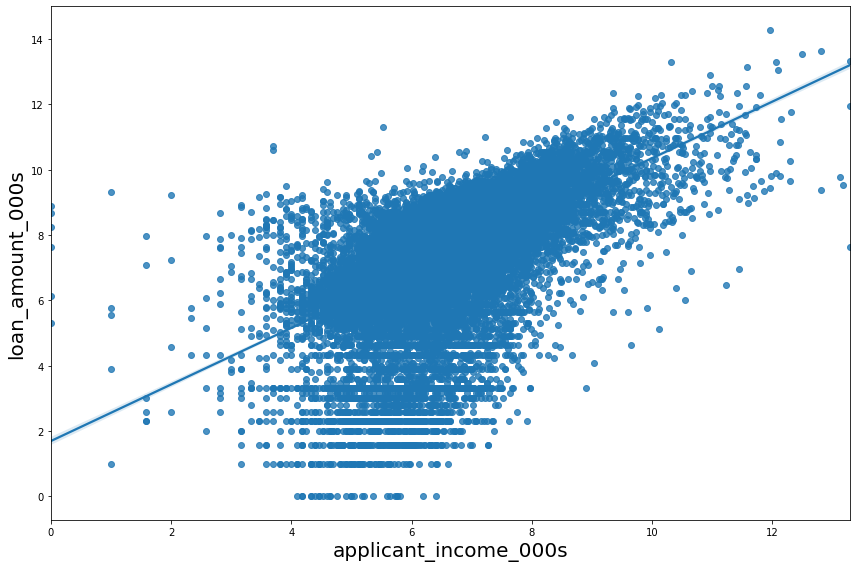

In [131]:
plt.xlabel('applicant_income_000s', fontsize = 20)
plt.ylabel('loan_amount_000s', fontsize = 20)
sns.regplot(x = np.log2(mortgage.applicant_income_000s), y = np.log2(mortgage.loan_amount_000s), data = mortgage)

#### .מהגרף הזה עולה כי ככל שאדם מרוויח יותר- כך הוא גם יבקש הלוואה גדולה יותר
#### :מסקנה זו מובילה אותנו לסיכום התובנה הראשונה שלנו
### .מאחר והעשירון העליון מרוויח הכי הרבה במדינה- ככל הנראה הוא גם המעמד הכלכלי שיקח את המשכנתא הגבוהה ביותר במדינה
######

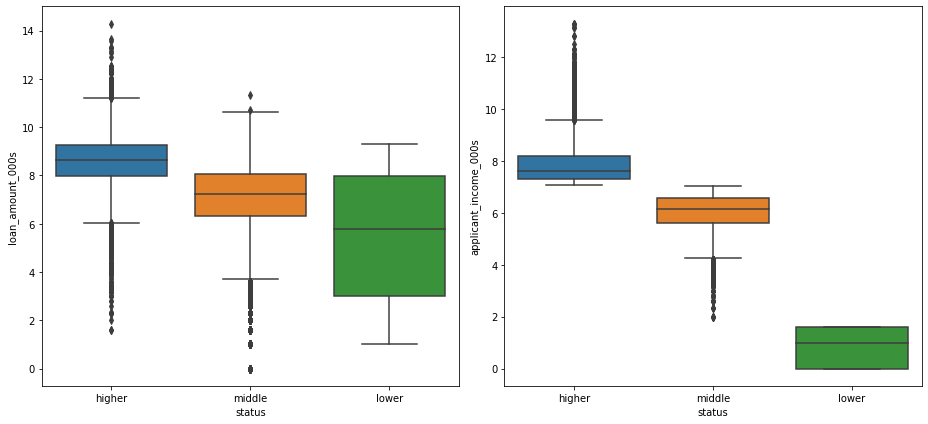

<Figure size 432x288 with 0 Axes>

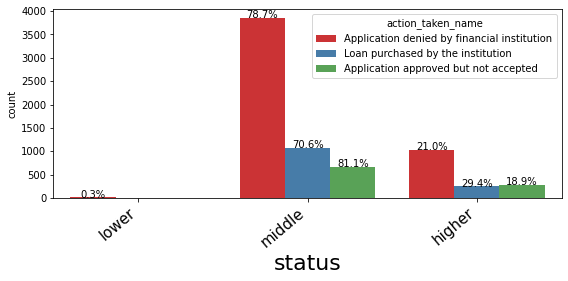

In [108]:
fig, ax = plt.subplots(1,2, figsize = (13,6))
plt.subplots_adjust(wspace = 3.5)

ax1 = sns.boxplot(x = mortgage.status, y = np.log2(mortgage.loan_amount_000s), data = mortgage, ax = ax[0])
ax2 = sns.boxplot(x = mortgage.status, y = np.log2(mortgage.applicant_income_000s), data = mortgage, ax = ax[1])

plt.figure(figsize=(6,4))
plt.show()


plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
x = category
y =percents
percentage = percents

plt.xlabel('status', fontsize = 22)
plt.xticks(size = 15)
df = sns.countplot(data = data, x = 'status',hue = 'action_taken_name', palette = "Set1", order = ['lower', 'middle', 'higher'])
patches = df.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   df.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
df.set_xticklabels(df.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### .בגרף מימין אנו רואים את המעמד הכלכלי של מבקש ההלוואה למול גובה **ההכנסה** שלו, ובגרף השמאלי אנו רואים את המעמד הכלכלי של המועמד למול גובה **ההלוואה** שלו
#### מהשוואה זו, אנו רואים כי חציון העשירון העליון וחציון מעמד הביניים מבקשים את גודל ההלוואה בצורה פרופורציונלית לחציון ההכנסות שלהם  
####  .בעוד שהעשירון התחתון "קופץ" כמה וכמה דרגות הכנסה
#### .חציון גובה ההלוואה שהמעמד הנמוך מבקש הוא כמעט בגובה חציון ההכנסה של מעמד הביניים
#### .כפי שראינו בגרף הבודק את אחוזי האישורים והדחיות של הבקשות לכל מעמד- למעמד הנמוך לא אושרה אף הלוואה
### מכאן אנו מסיקים כי אפשרות אחת לכך שלא אושרה אף הלוואה למעמד זה, היא שהם לא מבקשים הלוואה בסדר גודל העולה על הדעת
### .ביחס לרמת ההכנסה שלהם
#####

## חיזוי

#### .הפונקציה שלפנינו תיצור עמודה חדשה לתוך הדאטה. העמודה תגיד לנו האם הבנק אישר את הבקשה

In [109]:
data_fix = application_denied.append(application_confirmed, ignore_index = True)

def conditions(s):
    if s['action_taken'] == 3:
        return 'denied'
    else:
        return 'confirmed'
data_fix['confirmed or denied'] = data_fix.apply(conditions, axis=1)

#### .כעת ניצור עץ שתפקידו לנבא לגבי כל בקשה האם היא תאושר

In [110]:
#בחרנו בעזרת אילו עמודות העץ ינבא.
features = [ 'applicant_income_000s', 'applicant_race_1', 'applicant_sex', 'loan_purpose', 'loan_type' , 'loan_amount_000s', 'hud_median_family_income' ]
X = data_fix[features]
y = data_fix['confirmed or denied']

# פיצול הנתונים לשני חלקים: אימון ומבחן.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

# הגדרת המודל
my_model = sk.tree.DecisionTreeClassifier(criterion="gini",max_depth=3)

# אימון המודל
my_model.fit(X_train,y_train)

print("Making predictions for action_taken_name:")
prediction= pd.DataFrame(y_test)

prediction['prediction'] = my_model.predict(X_test)
prediction.tail()

Making predictions for action_taken_name:


,confirmed or denied,prediction
4976,confirmed,confirmed
2900,denied,denied
1833,denied,denied
3755,denied,denied
1413,denied,denied


The accuracy of the Decision Tree is 0.7306976744186047


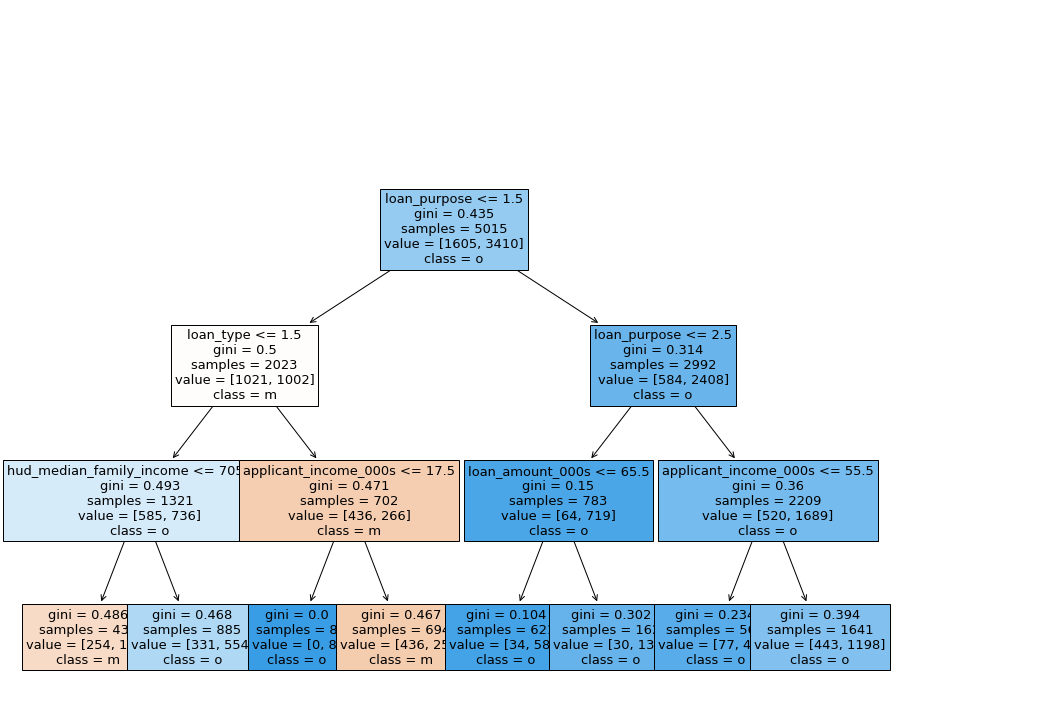

In [111]:
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction.prediction,y_test))
fig = plt.figure(figsize=(15,10))
tree.plot_tree(my_model, feature_names = features, class_names = 'model1.classes_',filled=True, rounded = False,fontsize=13)  
plt.show()

#### .ניתן לראות שהעמודה הדומיננטית המשמשת לחיזוי היא מטרת ההלוואה

#### We wish you-

In [112]:
Image(url = "https://i.pinimg.com/564x/3a/a2/86/3aa286234ffaec7c4b6278b355936cab.jpg",  width=250, height=250)

##### .בגרף הבא נשווה בין מטרות ההלוואה כשההלוואה נדחתה, ובין מטרות ההלוואה כשההלוואה אושרה 

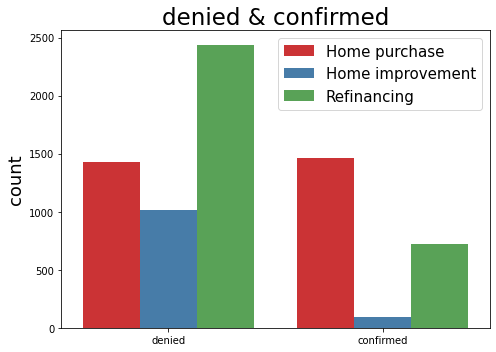

In [136]:
plt.figure(figsize=(7,5))
plt.title('denied & confirmed', fontsize = 23)
plt.ylabel('ylabel', fontsize=18)
df = sns.countplot(data = data_fix, hue = 'loan_purpose_name',x = 'confirmed or denied', palette = "Set1")
df.set(xlabel='', ylabel='count')
df.legend(fontsize=15)

<AxesSubplot:xlabel='status', ylabel='loan_purpose_name'>

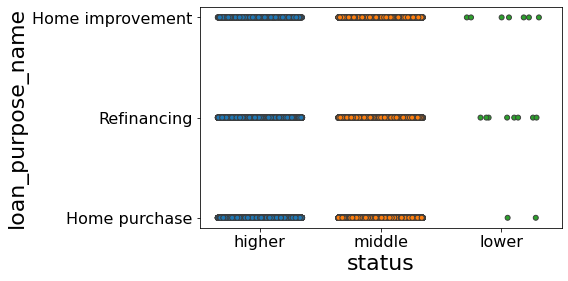

In [114]:
plt.xlabel("status", fontsize = 22)
plt.ylabel("status", fontsize = 22)
plt.xticks(size = 16)
plt.yticks(size = 16)

sns.stripplot(x = mortgage.status, y = mortgage.loan_purpose_name, data = mortgage, jitter = 0.35, linewidth = 0.95)

### ,אנו רואים כי מעט ממבקשי ההלוואה השייכים לעשירון התחתון ביקשו אותה לשם קניית דירה
### .וזו אפשרות נוספת למדוע לא מאשרים את בקשותיהם
#####

## סיכום

#### :מהתובנות שהעלינו, אנו ממליצים למנהלי הבנקים לבחון את האפשרויות הבאות
* ?מאחר וראינו שככל שעולה גובה ההכנסה- כך עולה גובה הבקשה, בנוסף לכך- אנו סוברים כי הלוואה לעשירון העליון תהיה בטוחה יותר מלמעמדות אחרים. מדוע אחוז גבוה מבקשות ההלוואה שנדחו שייך לעשירון העליון 
######
* -הצעת ייעול

.מצאנו כי העשירון התחתון מבקש הלוואה גבוהה בהרבה ביחס למה שהוא מכניס, ושלא מתקבלת אף בקשת הלוואה שלו 
.אנו חושבים ששווה ליצור באפליקציית הבנק ובאתר הבנק אלגוריתם נוח שבלי הכנסת הנתונים אליו, אף אדם לא יוכל להגיש בקשה למשכנתא
,אלגוריתם זה ישתמש בעץ הניבוי שלנו, יסנן רמות הכנסה פנויה לפי מעמדות שיגדיר הבנק, וימנע מהמבקשים שלא עומדים בקריטריונים להגיש בקשה
.ובכך נוריד עומס מיותר מנציגי הבנק, ונמנע את מעבר התהליך ממגישי הבקשה שממילא לא צפויה להתקבל אצל הבנק

* .לפני שאדם מהעשירון התחתון מתלבט בכלל האם לפנות לבקשת משכנתא- אולי שווה שישאל את עצמו מה מטרת המשכנתא שהוא מעוניין ללוות
.כמובן שדבר זה מתייתר, במידה והבנקים ממילא מחייבים אותו בשאלון מקדים

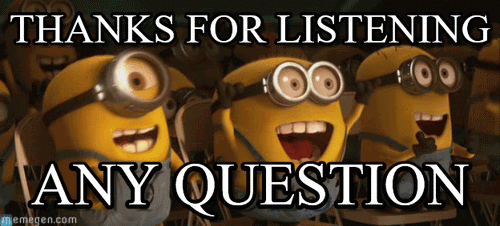

**הזכויות שמורות ©**